In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Customer Behavior/E-commerce Dataset.csv')

In [21]:
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


Order_Date: The date the product was ordered.

Aging: The time from the day the product is ordered to the day it is delivered.

Customer_id: Unique id created for each customer.

Gender: Gender of customer.

Device_Type: The device the customer uses to actualize the transaction (Web/Mobile).

Customer_Login_Type: The type the customer logged in. Such as Member, Guest etc.

Product_Category: Product category

Product: Product

Sales: Total sales amount

Quantity: Unit amount of product

Discount: Percent discount rate

Profit: Profit

Shipping_cost: Shipping cost

Order_Priority: Order priority. Such as critical, high etc.

Payment_method: Payment method

In [27]:
df.shape

(51290, 16)

In [28]:
df.isnull().sum()

,0
Order_Date,0
Time,0
Aging,1
Customer_Id,0
Gender,0
Device_Type,0
Customer_Login_type,0
Product_Category,0
Product,0
Sales,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [30]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [31]:
df1 = df.dropna()

In [32]:
duplicate_rows = df1.duplicated()
duplicate_rows.sum()

0

In [41]:
gender_segmentation = df1.groupby('Gender')['Customer_Id'].count()
gender_segmentation

,Customer_Id
Gender,
Female,23150
Male,28132


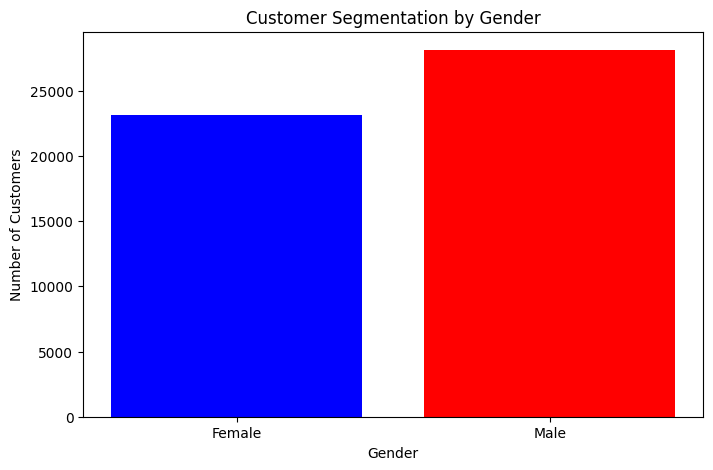

In [40]:

plt.figure(figsize=(8, 5))
plt.bar(gender_segmentation.index, gender_segmentation.values, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Gender')
plt.show()


In [46]:
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'])
time_series_data = df1.groupby(['Gender', 'Order_Date'])['Sales'].sum().reset_index()


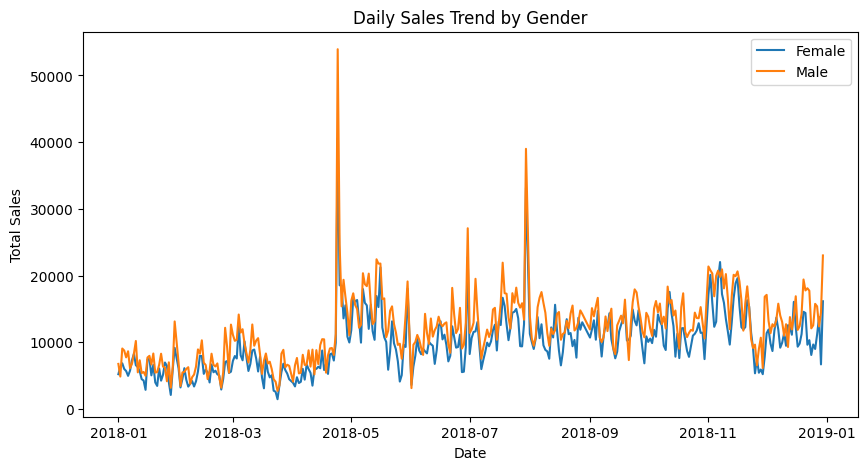

In [49]:
plt.figure(figsize=(10, 5))
for gender in time_series_data['Gender'].unique():
    subset = time_series_data[time_series_data['Gender'] == gender]
    plt.plot(subset['Order_Date'], subset['Sales'], label=gender)

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend by Gender')
plt.legend()
plt.show()


In [51]:
purchasing_behavior_profit = df1.groupby('Gender')['Profit'].mean()
print(purchasing_behavior_profit)

Gender
Female    69.987058
Male      70.743086
Name: Profit, dtype: float64


In [52]:
purchasing_behavior_quantity = df1.groupby('Gender')['Quantity'].mean()
print(purchasing_behavior_quantity)

Gender
Female    2.550929
Male      2.463494
Name: Quantity, dtype: float64


In [55]:
purchasing_behavior_profit = df1.groupby('Gender')['Profit'].mean()
print(purchasing_behavior_profit)

Gender
Female    69.987058
Male      70.743086
Name: Profit, dtype: float64


In [59]:
purchasing_behavior_quantity = df1.groupby('Gender')['Quantity'].mean()
print(purchasing_behavior_quantity)

Gender
Female    2.550929
Male      2.463494
Name: Quantity, dtype: float64


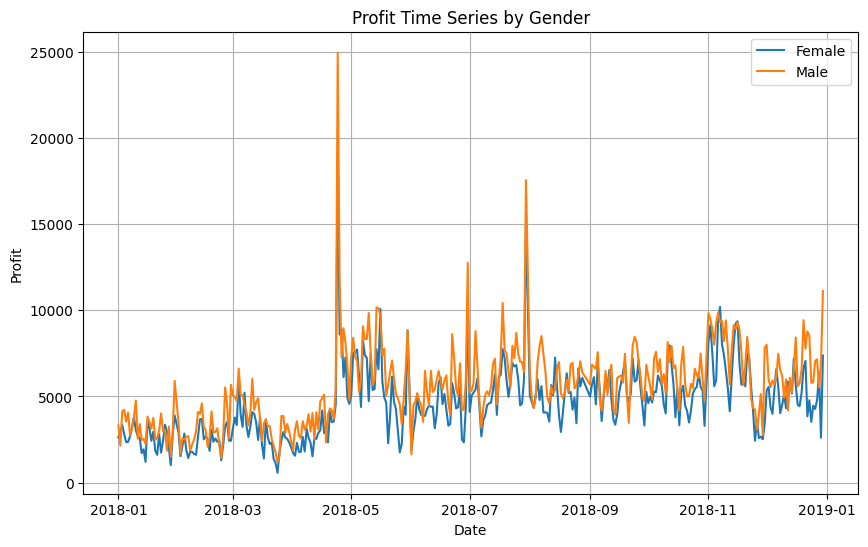

In [57]:
time_series_data_profit = df1.groupby(['Gender', 'Order_Date'])['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
for gender in genders:
    gender_data = time_series_data_profit[time_series_data['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Profit'], label=gender)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()


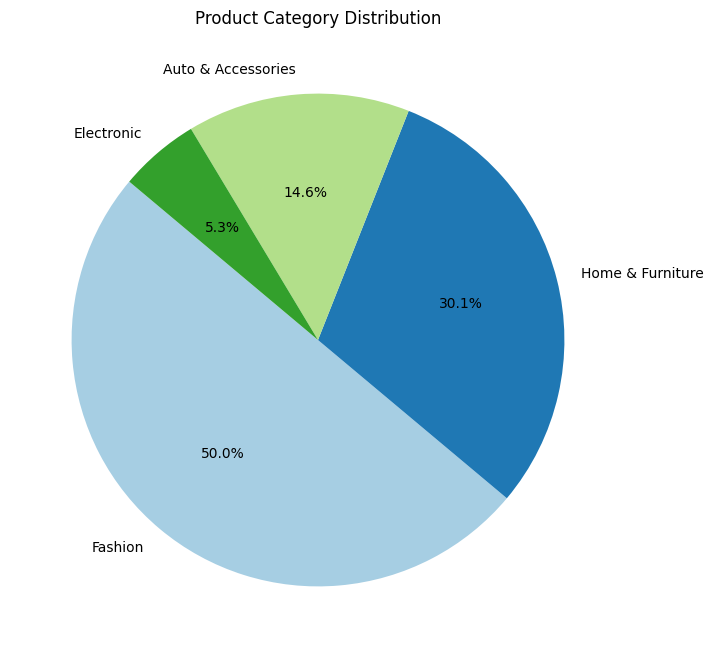

In [65]:
category_counts = df1['Product_Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Product Category Distribution')
plt.show()


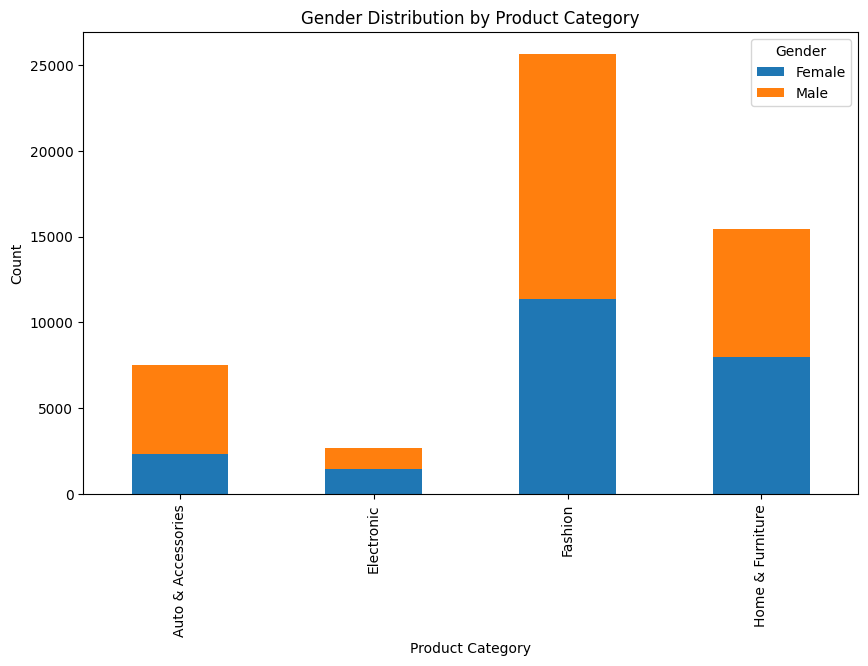

In [61]:
gender_category_counts = df1.groupby(['Product_Category', 'Gender']).size().unstack()

gender_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Gender Distribution by Product Category')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

plt.show()

**Overall, both Gender Segments have had very similar purchasing behaviours over the course of 12 months with male customers being interested more in Auto & Accessories and female customers are more in Fashion products.**

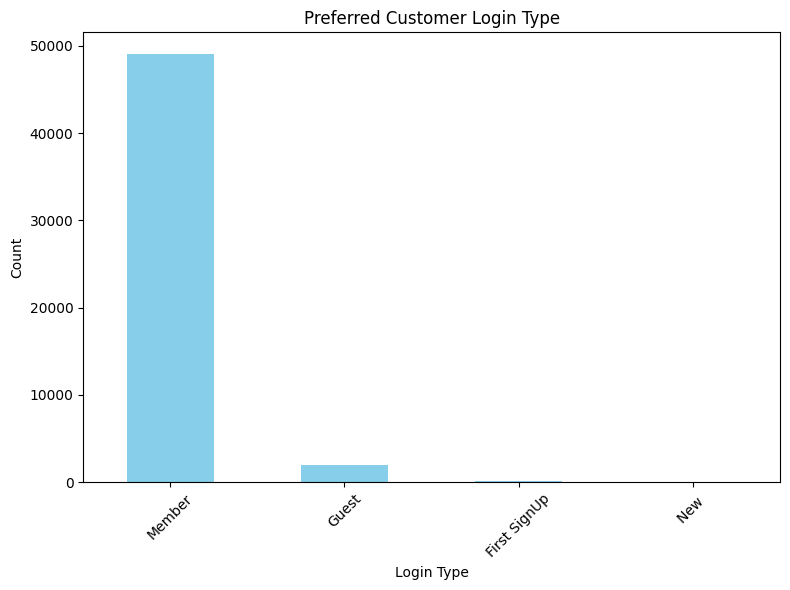

In [66]:
login_type_counts = df1['Customer_Login_type'].value_counts()

plt.figure(figsize=(8, 6))
login_type_counts.plot(kind='bar', color='skyblue')
plt.title('Preferred Customer Login Type')
plt.xlabel('Login Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Sales Analyzing**

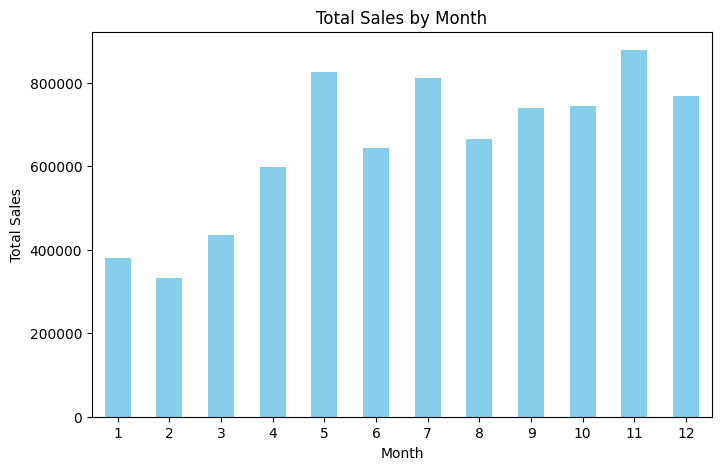

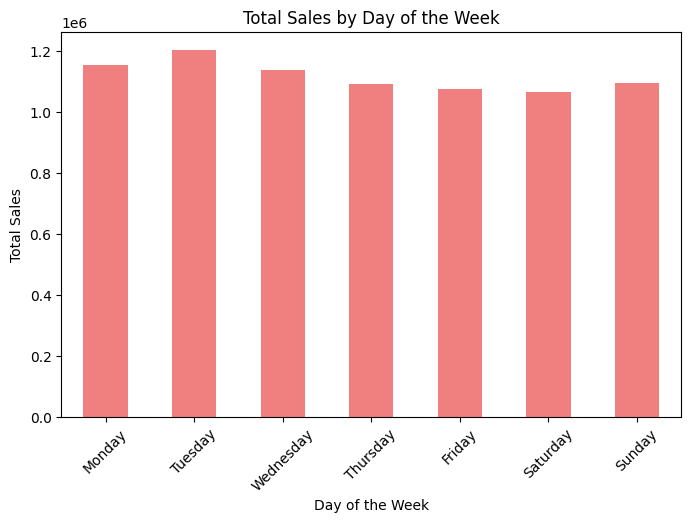

In [68]:
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'])

df1['Month'] = df1['Order_Date'].dt.month
df1['Day_of_Week'] = df1['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6

monthly_sales = df1.groupby('Month')['Sales'].sum()
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Sales', title='Total Sales by Month', color='skyblue')
plt.xticks(rotation=0)
plt.show()

day_of_week_sales = df1.groupby('Day_of_Week')['Sales'].sum()
day_of_week_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 5))
day_of_week_sales.plot(kind='bar', xlabel='Day of the Week', ylabel='Total Sales', title='Total Sales by Day of the Week', color='lightcoral')
plt.xticks(rotation=45)
plt.show()


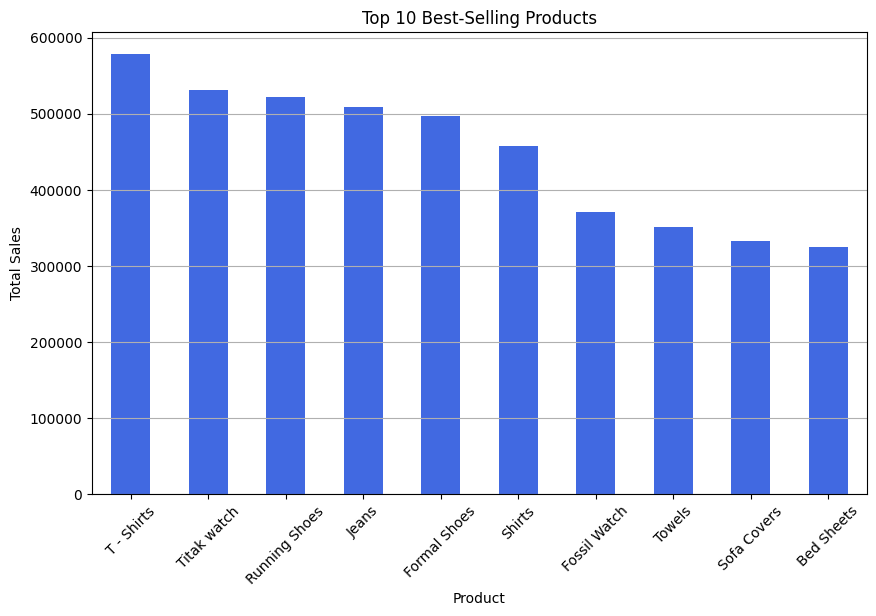

In [69]:
top_selling_products = df1.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_selling_products.head(10).plot(kind='bar', color='royalblue')  # Top 10 products
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

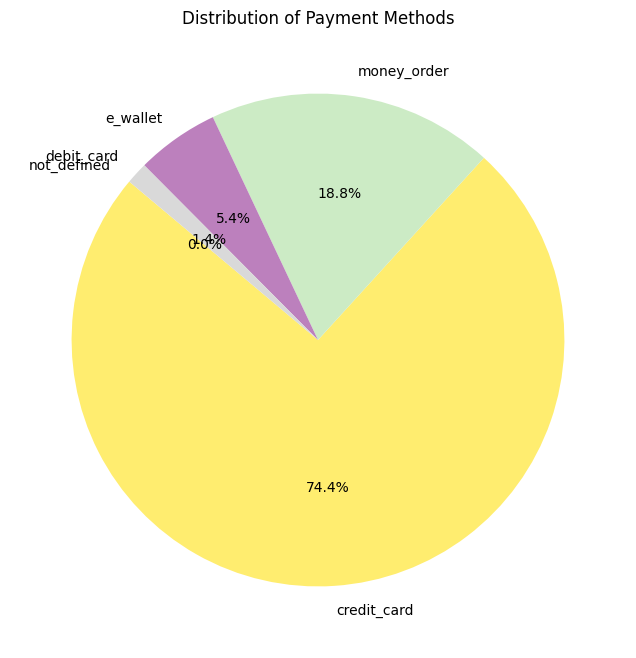

In [78]:
payment_counts = df1['Payment_method'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%2.1f%%', startangle=140, colors=plt.cm.Set3_r.colors)
plt.title('Distribution of Payment Methods')
plt.show()



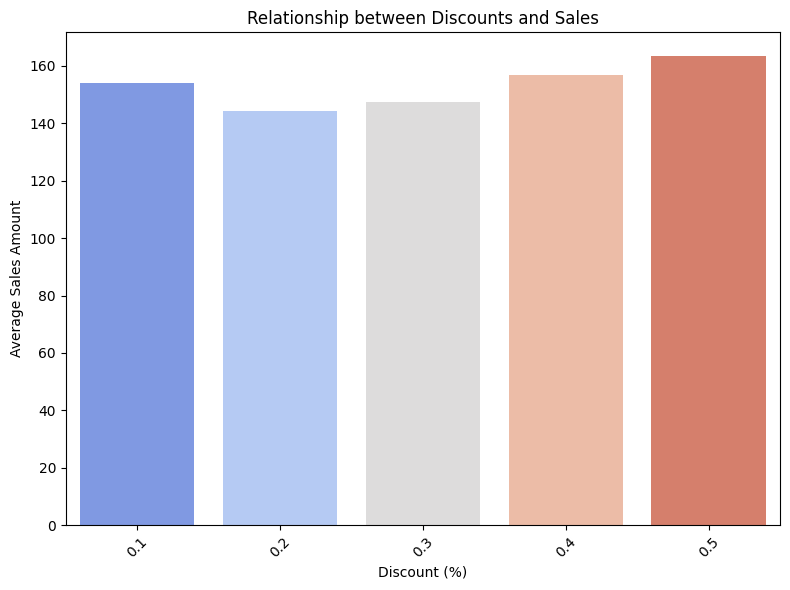

In [87]:
discount_sales = df1.groupby('Discount')['Sales'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=discount_sales.index, y=discount_sales.values, palette="coolwarm")
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales Amount')
plt.title('Relationship between Discounts and Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()